# Analysis of TEBD on the Ising Model

In [169]:
import time

import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

from tebd.tebd import run_tebd

In [170]:
model_name = 'ising'

## Effect of $\lambda$

In [238]:
Ns = [3, 6, 9, 12]

In [172]:
lmdas = np.linspace(0, 2, 20)

In [173]:
observables = ['energy']

In [174]:
energies_N_lmda = np.zeros((len(Ns), len(lmdas)))

with tqdm(total=len(Ns) * len(lmdas)) as pbar:
    for i in range(len(Ns)):
        for j in range(len(lmdas)):
            model_params = {"lmda": lmdas[j]}
            observables_at_midsteps = run_tebd(
                model_name, model_params, Ns[i], observables=observables, print_to_stdout=False
            )
            energies_N_lmda[i, j] = observables_at_midsteps["energy"][-1]
            pbar.update(1)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [06:38<00:00,  4.98s/it]


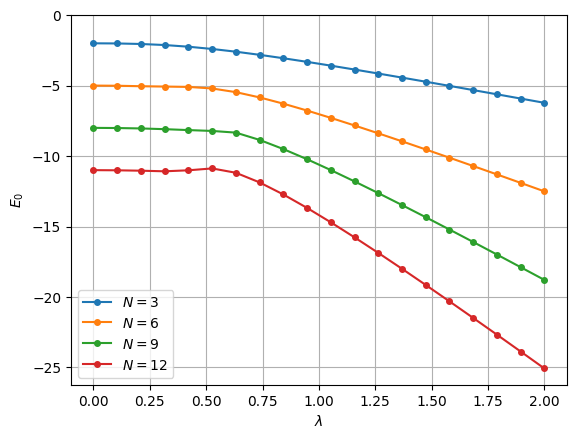

In [240]:
plt.plot(lmdas, energies_N_lmda[0], 'o-', markersize=4, label=f"$N = {Ns[0]}$")
plt.plot(lmdas, energies_N_lmda[1], 'o-', markersize=4, label=f"$N = {Ns[1]}$")
plt.plot(lmdas, energies_N_lmda[2], 'o-', markersize=4, label=f"$N = {Ns[2]}$")
plt.plot(lmdas, energies_N_lmda[3], 'o-', markersize=4, label=f"$N = {Ns[3]}$")
plt.xlabel("$\lambda$")
plt.ylabel("$E_0$")
plt.yticks(range(-25, 5, 5))
plt.legend()
plt.grid()
plt.savefig('../figures/energy_vs_lambda_diff_N.png', bbox_inches='tight', dpi=300);

As $N$ increases, the energy goes down. The energy also decreases with $\lambda$ as all spins align down with respect to the magnetic field. There is a phase transition at $\lambda = 1$.

## Effect of $N$

Consider the $\lambda=0$ case.

In [176]:
Ns = range(3, 15)

In [177]:
model_params = {}

In [178]:
energies_theor = [-N + 1 for N in Ns]

In [179]:
energies_N = np.zeros(len(Ns))
run_times_N = np.zeros(len(Ns))

for i in tqdm(range(len(Ns))):
    start = time.time()
    observables_at_midsteps = run_tebd(
        model_name, model_params, Ns[i], observables=observables, print_to_stdout=False
    )
    run_times_N[i] = time.time() - start
    energies_N[i] = observables_at_midsteps['energy'][-1]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [10:37<00:00, 53.12s/it]


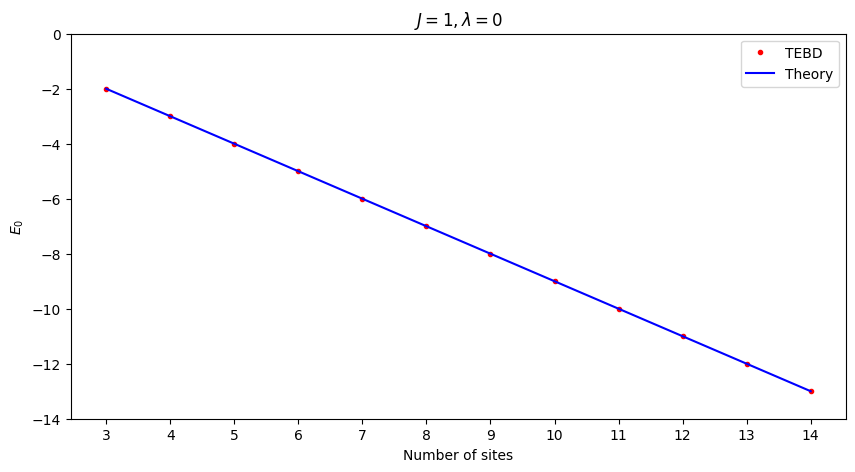

In [180]:
plt.figure(figsize=(10, 5))
plt.plot(Ns, energies_N, 'ro', markersize=3, label="TEBD")
plt.plot(Ns, energies_theor, "b-", label="Theory")
plt.xlabel("Number of sites")
plt.ylabel("$E_0$")
plt.xticks(Ns)
plt.legend()
plt.ylim([-14, 0])
plt.title("$J = 1, \lambda=0$")
plt.savefig('../figures/energy_vs_N_lambda_0.png', bbox_inches='tight', dpi=300);

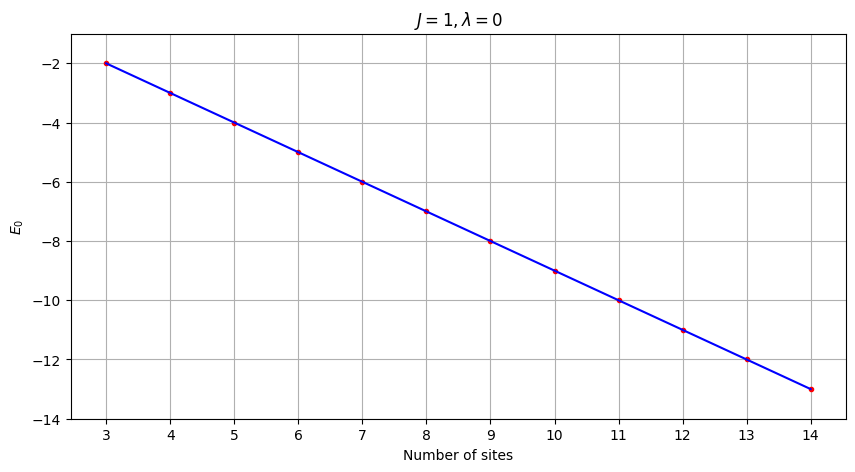

In [181]:
plt.figure(figsize=(10, 5))
plt.plot(Ns, energies_N, 'ro', markersize=3, label="TEBD")
plt.plot(Ns, energies_theor, "b-", label="Theory")
plt.xlabel("Number of sites")
plt.ylabel("$E_0$")
plt.xticks(Ns)
plt.grid()
plt.ylim([-14, -1])
plt.title("$J = 1, \lambda=0$")
plt.savefig('../figures/energy_vs_N_lambda_0_no_legend.png', bbox_inches='tight', dpi=300);

The results from the TEBD algorithm follow the theoretical values nicely.

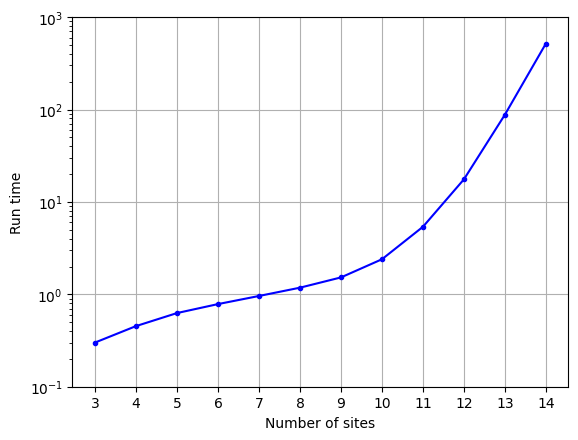

In [182]:
plt.plot(Ns, run_times_N, 'bo-', markersize=3)
plt.xlabel("Number of sites")
plt.ylabel("Run time")
plt.xticks(Ns)
plt.yscale("log")
plt.grid()
plt.ylim([0.1, 1000])
plt.savefig('../figures/run_times_vs_N.png', bbox_inches='tight', dpi=300);

The run time scales approximately exponentially with the number of sites.

Next, consider large values of $\lambda$.

In [183]:
model_params = {'lmda': 100}

In [184]:
energies_theor_ext_field = [-N * model_params['lmda'] for N in Ns]

In [185]:
energies_N_lmda_100 = np.zeros(len(Ns))

for i in tqdm(range(len(Ns))):
    observables_at_midsteps = run_tebd(
        model_name, model_params, Ns[i], observables=observables, print_to_stdout=False
    )
    energies_N_lmda_100[i] = observables_at_midsteps['energy'][-1]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [10:28<00:00, 52.37s/it]


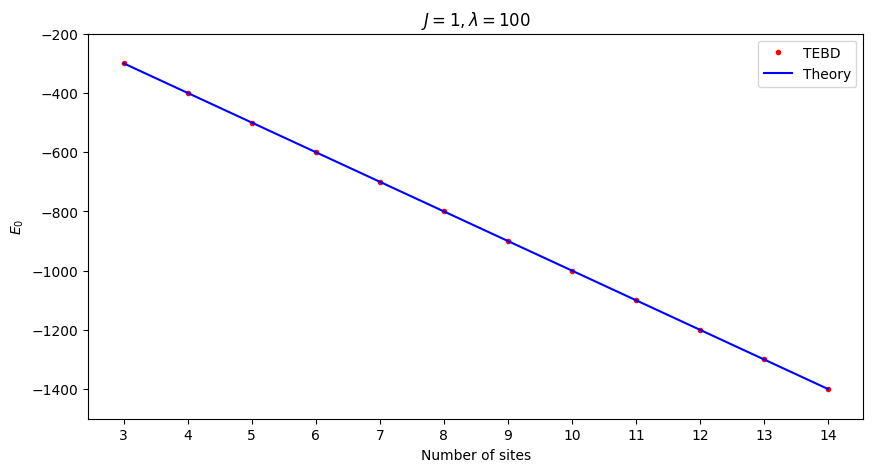

In [186]:
plt.figure(figsize=(10, 5))
plt.plot(Ns, energies_N_lmda_100, 'ro', markersize=3, label="TEBD")
plt.plot(Ns, energies_theor_ext_field, "b-", label="Theory")
plt.xlabel("Number of sites")
plt.ylabel("$E_0$")
plt.xticks(Ns)
plt.legend()
plt.ylim([-1500, -200])
plt.title(f"$J = 1, \lambda={model_params['lmda']}$")
plt.savefig('../figures/energy_vs_N_lambda_100.png', bbox_inches='tight', dpi=300);

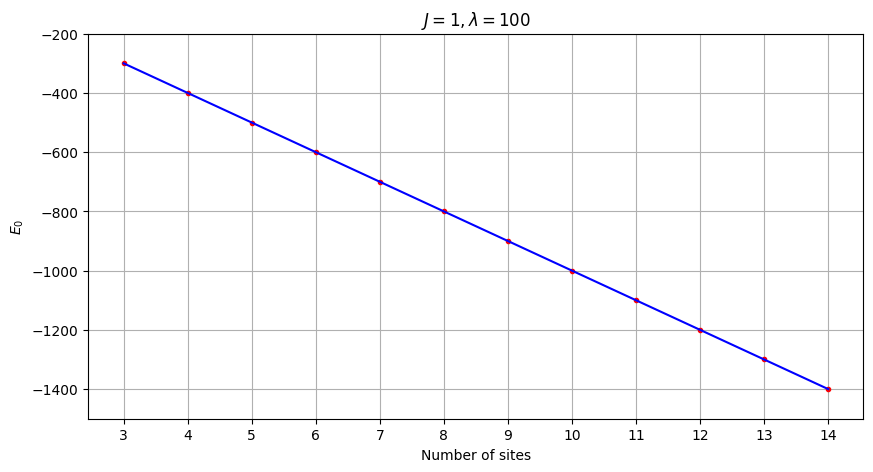

In [187]:
plt.figure(figsize=(10, 5))
plt.plot(Ns, energies_N_lmda_100, 'ro', markersize=3, label="TEBD")
plt.plot(Ns, energies_theor_ext_field, "b-", label="Theory")
plt.xlabel("Number of sites")
plt.ylabel("$E_0$")
plt.xticks(Ns)
plt.grid()
plt.ylim([-1500, -200])
plt.title(f"$J = 1, \lambda={model_params['lmda']}$")
plt.savefig('../figures/energy_vs_N_lambda_100_no_legend.png', bbox_inches='tight', dpi=300);

Again, the results follow the theoretical expectation in the large $\lambda$ limit.

In [206]:
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

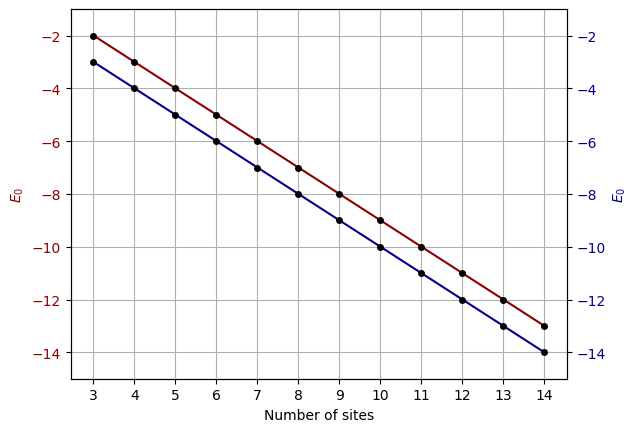

In [231]:
fig, ax1 = plt.subplots()

color = 'darkred'
ax1.plot(Ns, energies_theor, "-", label="$\lambda = 0$", color=color)
ax1.plot(Ns, energies_N, 'ko', markersize=4, label="TEBD")
ax1.set_xlabel('Number of sites')
ax1.set_ylabel('$E_0$', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(Ns)
ax1.grid()
# ax1.legend(loc='upper right')
ax1.set_ylim([-15, -1])

ax2 = ax1.twinx()

color = 'darkblue'
ax2.set_ylabel('$E_0$', color=color) 
ax2.plot(Ns, np.array(energies_theor_ext_field) / 100, "-", label="$\lambda = 100$", color=color)
ax2.plot(Ns, energies_N_lmda_100 / 100, 'ko', markersize=4, label="TEBD")
ax2.set_ylim([-15, -1])
# ax2.legend(loc='lower left')
ax2.tick_params(axis='y', labelcolor=color)

plt.savefig('../figures/energy_vs_N_lambda_0_100_no_legend.png', bbox_inches='tight', dpi=300);

## Effect of Bond Dimension

In [191]:
d = 2
N = 10

In [192]:
model_params = {}

In [193]:
num_iter = 210
mid_steps = 10

In [194]:
bond_dims = [2, 10, 20]

In [195]:
iterations = range(0, num_iter, mid_steps)

In [196]:
energies_bond_dims = np.zeros((len(bond_dims), len(iterations)))

for i in tqdm(range(len(bond_dims))):
    observables_at_midsteps = run_tebd(
        model_name, model_params, N, bond_dim=bond_dims[i], num_iter=num_iter, mid_steps=mid_steps,
        observables=observables, print_to_stdout=False
    )
    energies_bond_dims[i] = observables_at_midsteps['energy']

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [02:08<00:00, 42.69s/it]


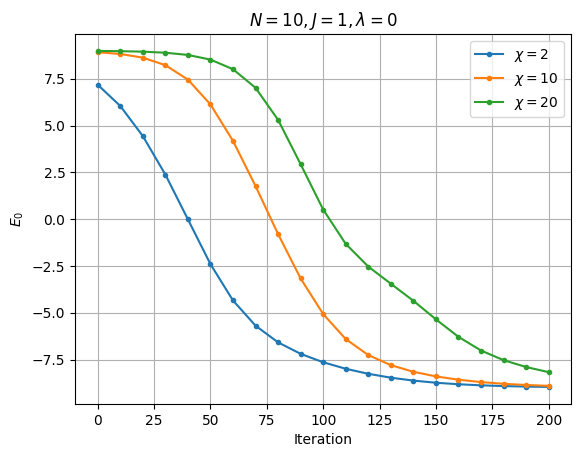

In [198]:
plt.plot(iterations, energies_bond_dims[0], 'o-', markersize=3, label=f"$\chi = {bond_dims[0]}$")
plt.plot(iterations, energies_bond_dims[1], 'o-', markersize=3, label=f"$\chi = {bond_dims[1]}$")
plt.plot(iterations, energies_bond_dims[2], 'o-', markersize=3, label=f"$\chi = {bond_dims[2]}$")
plt.xlabel("Iteration")
plt.ylabel("$E_0$")
plt.legend()
plt.title("$N=10, J=1, \lambda=0$")
plt.grid()
plt.savefig('../figures/energy_vs_iterations_diff_bond_dim.png', bbox_inches='tight', dpi=300);

As the bond dimension increases, the number of iterations to converge usually increases.

In [69]:
bond_dims = range(2, 14)

In [70]:
run_times_bond_dims = np.zeros((len(bond_dims), len(iterations)))

for i in tqdm(range(len(bond_dims))):
    start = time.time()
    observables_at_midsteps = run_tebd(
        model_name, model_params, N, bond_dim=bond_dims[i], num_iter=num_iter, mid_steps=mid_steps,
        observables=observables, print_to_stdout=False
    )
    run_times_bond_dims[i] = time.time() - start

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [04:38<00:00, 23.20s/it]


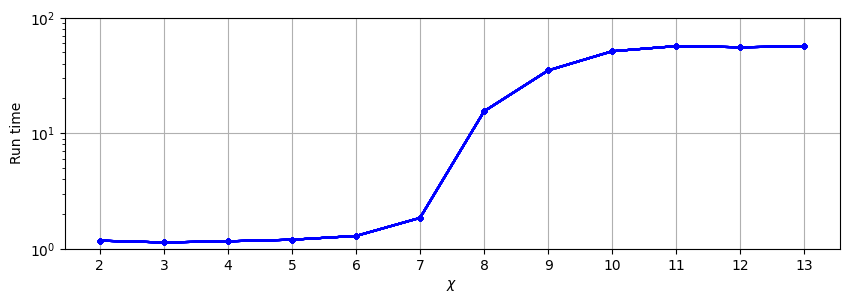

In [77]:
plt.figure(figsize=(10, 3))
plt.plot(bond_dims, run_times_bond_dims, 'bo-', markersize=3)
plt.xlabel("$\chi$")
plt.ylabel("Run time")
plt.xticks(bond_dims)
plt.yscale("log")
plt.ylim([1, 100])
plt.grid()
plt.savefig('../figures/run_times_vs_bond_dim.png', bbox_inches='tight', dpi=300);

## Effect of $J$

In [24]:
Js = [-2, -1, 1, 2]

In [25]:
energies_J = np.zeros((len(Js), len(iterations)))

for i in tqdm(range(len(Js))):
    model_params = {'J': Js[i]}
    observables_at_midsteps = run_tebd(
        model_name, model_params, N, num_iter=num_iter, mid_steps=mid_steps, observables=observables,
        print_to_stdout=False
    )
    energies_J[i] = observables_at_midsteps['energy']

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:04<00:00,  1.05s/it]


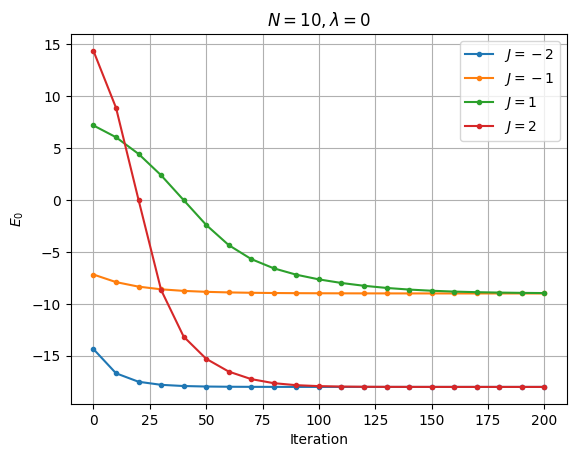

In [26]:
plt.plot(iterations, energies_J[0], 'o-', markersize=3, label=f"$J={Js[0]}$")
plt.plot(iterations, energies_J[1], 'o-', markersize=3, label=f"$J={Js[1]}$")
plt.plot(iterations, energies_J[2], 'o-', markersize=3, label=f"$J={Js[2]}$")
plt.plot(iterations, energies_J[3], 'o-', markersize=3, label=f"$J={Js[3]}$")
plt.xlabel("Iteration")
plt.ylabel("$E_0$")
plt.legend()
plt.title("$N=10, \lambda=0$")
plt.grid()
plt.savefig('../figures/energy_vs_iterations_diff_J.png', bbox_inches='tight', dpi=300);

The energy converges to the same value if $|J|$ is the same. The energy is lower if $|J|$ is greater.

## Effect of Suzuki-Trotter Decomposition

In [155]:
st_orders = ["ST1", "ST4"]

In [156]:
model_params = {}

In [157]:
energies_st_orders = np.zeros((len(st_orders), len(iterations)))
run_times_st_orders = np.zeros((len(st_orders), len(iterations)))

for i in tqdm(range(len(st_orders))):
    start = time.time()
    observables_at_midsteps = run_tebd(
        model_name, model_params, N, num_iter=num_iter, mid_steps=mid_steps, st_order=st_orders[i],
        observables=observables, print_to_stdout=False, rng_seed=1
    )
    run_times_st_orders[i] = time.time() - start
    energies_st_orders[i] = np.real(observables_at_midsteps['energy'])

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:04<00:00,  2.41s/it]


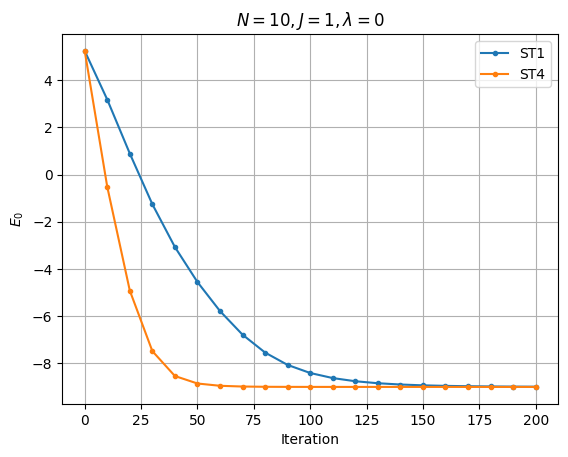

In [158]:
plt.plot(iterations, energies_st_orders[0], 'o-', markersize=3, label=st_orders[0])
plt.plot(iterations, energies_st_orders[1], 'o-', markersize=3, label=st_orders[1])
plt.xlabel("Iteration")
plt.ylabel("$E_0$")
plt.legend()
plt.title("$N= 10, J = 1, \lambda=0$")
plt.grid()
plt.savefig('../figures/energy_vs_iterations_diff_st_order.png', bbox_inches='tight', dpi=300);

In [163]:
bond_dim = 10

energies_st_orders = np.zeros((len(st_orders), len(iterations)))
run_times_st_orders = np.zeros((len(st_orders), len(iterations)))

for i in tqdm(range(len(st_orders))):
    start = time.time()
    observables_at_midsteps = run_tebd(
        model_name, model_params, N, num_iter=num_iter, mid_steps=mid_steps, bond_dim=bond_dim, st_order=st_orders[i],
        observables=observables, print_to_stdout=False, rng_seed=1
    )
    run_times_st_orders[i] = time.time() - start
    energies_st_orders[i] = np.real(observables_at_midsteps['energy'])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [07:52<00:00, 236.11s/it]


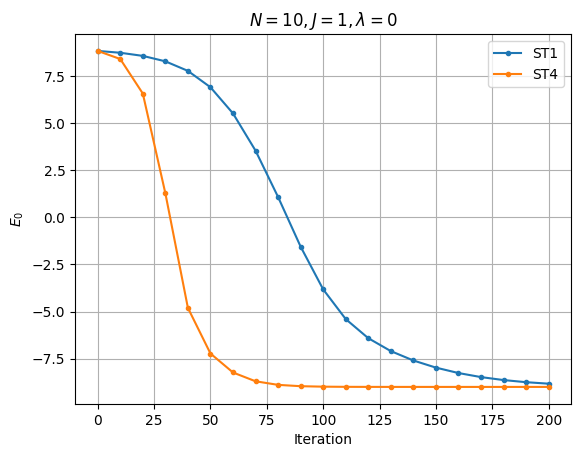

In [166]:
plt.plot(iterations, energies_st_orders[0], 'o-', markersize=3, label=st_orders[0])
plt.plot(iterations, energies_st_orders[1], 'o-', markersize=3, label=st_orders[1])
plt.xlabel("Iteration")
plt.ylabel("$E_0$")
plt.legend()
plt.title("$N= 10, J = 1, \lambda=0$")
plt.grid()
#plt.xlim([0, 25])
plt.savefig('../figures/energy_vs_iterations_diff_st_order.png', bbox_inches='tight', dpi=300);

In [167]:
run_times_st_orders

array([[ 58.92185712,  58.92185712,  58.92185712,  58.92185712,
         58.92185712,  58.92185712,  58.92185712,  58.92185712,
         58.92185712,  58.92185712,  58.92185712,  58.92185712,
         58.92185712,  58.92185712,  58.92185712,  58.92185712,
         58.92185712,  58.92185712,  58.92185712,  58.92185712,
         58.92185712],
       [413.27545977, 413.27545977, 413.27545977, 413.27545977,
        413.27545977, 413.27545977, 413.27545977, 413.27545977,
        413.27545977, 413.27545977, 413.27545977, 413.27545977,
        413.27545977, 413.27545977, 413.27545977, 413.27545977,
        413.27545977, 413.27545977, 413.27545977, 413.27545977,
        413.27545977]])

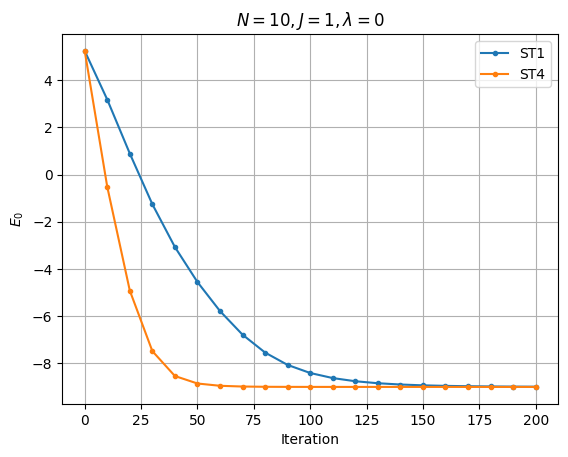

In [18]:
plt.plot(iterations, energies_st_orders[0], 'o-', markersize=3, label=st_orders[0])
plt.plot(iterations, energies_st_orders[1], 'o-', markersize=3, label=st_orders[1])
plt.xlabel("Iteration")
plt.ylabel("$E_0$")
plt.legend()
plt.title("$N= 10, J = 1, \lambda=0$")
plt.grid()
plt.savefig('../figures/energy_vs_iterations_diff_st_order.png', bbox_inches='tight', dpi=300);

The results are inconclusive.

## Entropy

Get entropy for a specific initial state.

In [136]:
N = 10
bond_dim = 2
num_iter = 210
mid_steps = 10

In [137]:
initial_state = '0111111111'

In [138]:
model_params = {}

In [139]:
observables = ['entropy']

In [140]:
observables_at_midsteps = run_tebd(
    model_name, model_params, N, bond_dim=bond_dim, num_iter=num_iter, mid_steps=mid_steps, observables=observables,
    print_to_stdout=False, initial_state=initial_state
)

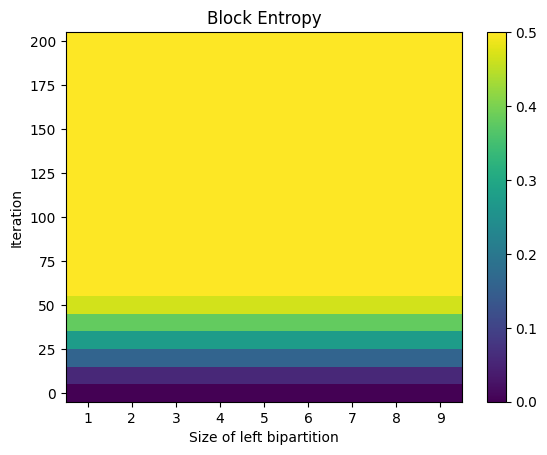

In [141]:
plt.pcolormesh(range(1, N), range(0, num_iter, mid_steps), observables_at_midsteps['entropy'])
plt.set_cmap('viridis')
plt.colorbar()
plt.title('Block Entropy')
plt.ylabel('Iteration')
plt.xlabel('Size of left bipartition')
plt.clim([0, 0.5])
plt.savefig('../figures/block_entropy_site_1_spin_up.png', bbox_inches='tight', dpi=300);

Get entropy for a random state.

In [142]:
observables_at_midsteps = run_tebd(
    model_name, model_params, N, bond_dim=bond_dim, num_iter=num_iter, mid_steps=mid_steps, observables=observables,
    print_to_stdout=False, rng_seed=1
)

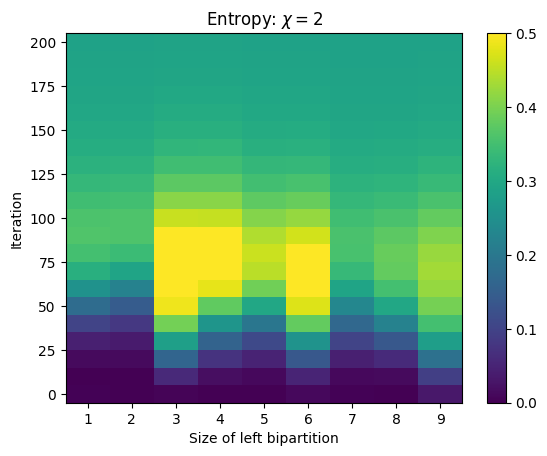

In [143]:
plt.pcolormesh(range(1, N), range(0, num_iter, mid_steps), observables_at_midsteps['entropy'])
plt.set_cmap('viridis')
plt.colorbar()
plt.title('Entropy: $\chi = 2$')
plt.ylabel('Iteration')
plt.xlabel('Size of left bipartition')
plt.clim([0, 0.5])
plt.savefig('../figures/block_entropy_site_chi_2.png', bbox_inches='tight', dpi=300);

Increase bond dimension.

In [144]:
bond_dim = 10

In [145]:
observables_at_midsteps = run_tebd(
    model_name, model_params, N, bond_dim=bond_dim, num_iter=num_iter, mid_steps=mid_steps, observables=observables,
    print_to_stdout=False, rng_seed=1
)

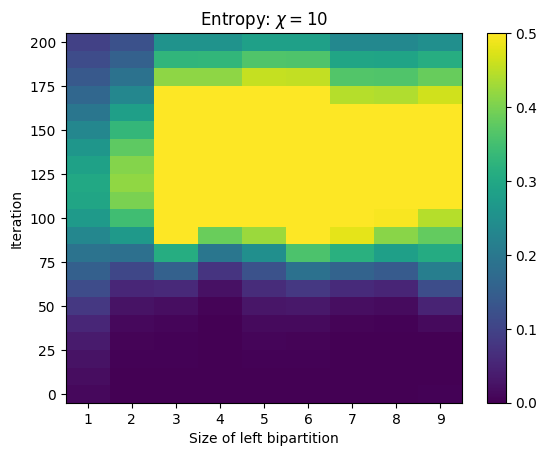

In [146]:
plt.pcolormesh(range(1, N), range(0, num_iter, mid_steps), observables_at_midsteps['entropy'])
plt.set_cmap('viridis')
plt.colorbar()
plt.title('Entropy: $\chi = 10$')
plt.ylabel('Iteration')
plt.xlabel('Size of left bipartition')
plt.clim([0, 0.5])
plt.savefig('../figures/block_entropy_site_chi_10.png', bbox_inches='tight', dpi=300);

## Magnetization

In [129]:
N = 3
tau = 0.1
num_iter = 510
mid_steps = 10

In [130]:
lmdas = np.logspace(-3, 3, 40)

In [131]:
times = [tau * i for i in range(0, num_iter, mid_steps)]

In [132]:
observables = ['z magnetization', 'x magnetization', 'y magnetization']

In [133]:
z_magnetization_lmda = np.zeros(len(lmdas))
x_magnetization_lmda = np.zeros(len(lmdas))
y_magnetization_lmda = np.zeros(len(lmdas))

for i in tqdm(range(len(lmdas))):
    model_params = {'lmda': lmdas[i]}
    observables_at_midsteps = run_tebd(
        model_name, model_params, N, num_iter=num_iter, mid_steps=mid_steps, observables=observables,
        print_to_stdout=False
    )
    z_magnetization_lmda[i] = observables_at_midsteps['z magnetization'][-1, 0]
    x_magnetization_lmda[i] = observables_at_midsteps['x magnetization'][-1, 0]
    y_magnetization_lmda[i] = observables_at_midsteps['y magnetization'][-1, 0]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:13<00:00,  2.95it/s]


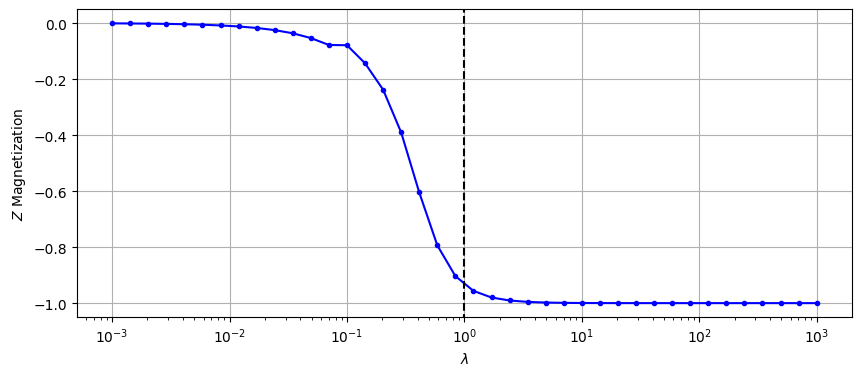

In [134]:
plt.figure(figsize=(10, 4))
plt.plot(lmdas, z_magnetization_lmda, 'bo-', markersize=3)
plt.plot([1, 1], [-2, 2], 'k--')
plt.gca().set_xscale("log")
plt.xlabel("$\lambda$")
plt.ylabel("$Z$ Magnetization")
plt.ylim([-1.05, 0.05])
plt.grid()
plt.savefig('../figures/z_magnetization_vs_lambda.png', bbox_inches='tight', dpi=300);

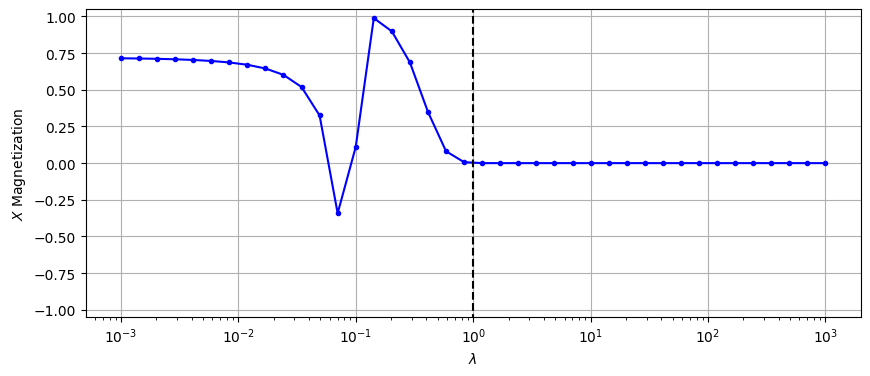

In [135]:
plt.figure(figsize=(10, 4))
plt.plot(lmdas, x_magnetization_lmda, 'bo-', markersize=3)
plt.plot([1, 1], [-2, 2], 'k--')
plt.gca().set_xscale("log")
plt.xlabel("$\lambda$")
plt.ylabel("$X$ Magnetization")
plt.ylim([-1.05, 1.05])
plt.grid()
plt.savefig('../figures/x_magnetization_vs_lambda.png', bbox_inches='tight', dpi=300);

Plot evolution of $Z$ magnetization at critical point in time.

In [14]:
N = 10
tau = 0.1
num_iter = 510
mid_steps = 10

In [15]:
lmda = 1

In [16]:
bond_dim = 20

In [38]:
times = [tau * i for i in range(0, num_iter, mid_steps)]

In [18]:
model_params = {'lmda': lmda}
observables_at_midsteps = run_tebd(
    model_name, model_params, N, num_iter=num_iter, mid_steps=mid_steps, observables=observables,
    print_to_stdout=False
)
magnetization_bond_dim_2 = observables_at_midsteps['magnetization']

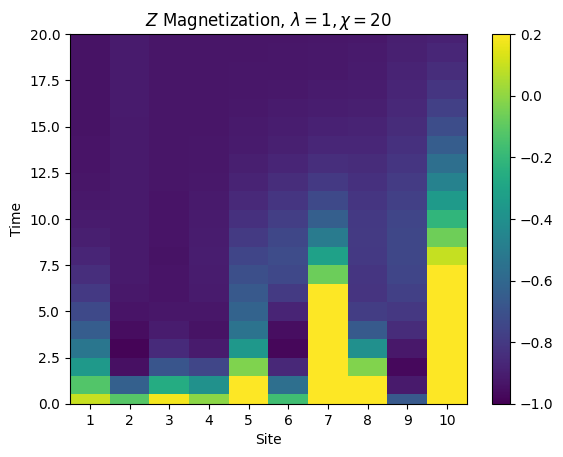

In [20]:
plt.pcolormesh(range(1, N + 1), times, magnetization_bond_dim_2)
plt.set_cmap('viridis')
plt.colorbar()
plt.title(f'$Z$ Magnetization, $\lambda = {lmda}, \chi={bond_dim}$')
plt.ylabel('Time')
plt.xlabel('Site')
plt.xticks(range(1, N + 1))
plt.ylim([0, 20])
plt.clim([-1, 0.2])
plt.savefig('../figures/z_magnetization_over_time.png', bbox_inches='tight', dpi=300);